In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import matplotlib.pyplot as plt


In [2]:
TRAIN_DIR = 'C:\\Users\\himan\\Downloads\\archive (10)\\'

In [3]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

valid_generator = img_datagen.flow_from_directory(TRAIN_DIR,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 1814 images belonging to 7 classes.
Found 452 images belonging to 7 classes.


In [4]:
model = Sequential()

model.add(keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet',
                                                                  include_top=False,
                                                                  input_shape=(100, 100, 3)))
model.add(L.Flatten())
model.add(L.Dense(256, activation='relu'))
model.add(L.Dropout(0.5))
model.add(L.Dense(7, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



219055592/219055592 [==============================] - 28s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1, 1, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 54732007 (208.79 MB)
Trainable params: 54671463 (208.56 MB)
Non-trainable params: 60544 (236.50 KB)
________

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.997):
            print("\nReached 99.7% accuracy so cancelling training!")
            self.model.stop_training = True

early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)
            
history = model.fit(train_generator, validation_data=valid_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   validation_steps=valid_generator.n//valid_generator.batch_size,
                    callbacks=[early],
                   epochs=10)


Epoch 1/10



56/56 [==============================] - 997s 7s/step - loss: 1.1969 - accuracy: 0.5960 - val_loss: 12.0423 - val_accuracy: 0.5357
Epoch 2/10
56/56 [==============================] - 143s 3s/step - loss: 0.6422 - accuracy: 0.7727 - val_loss: 10.6358 - val_accuracy: 0.5134
Epoch 3/10
56/56 [==============================] - 151s 3s/step - loss: 0.5350 - accuracy: 0.8171 - val_loss: 1.8114 - val_accuracy: 0.6674
Epoch 4/10
56/56 [==============================] - 155s 3s/step - loss: 0.4938 - accuracy: 0.8350 - val_loss: 0.8319 - val_accuracy: 0.7522
Epoch 5/10
56/56 [==============================] - 155s 3s/step - loss: 0.4577 - accuracy: 0.8406 - val_loss: 1.5112 - val_accuracy: 0.6920
Epoch 6/10
56/56 [==============================] - 157s 3s/step - loss: 0.3813 - accuracy: 0.8681 - val_loss: 0.6094 - val_accuracy: 0.8080
Epoch 7/10
56/56 [==============================] - 156s 3s/step - loss: 0.5732 - accuracy: 0.8418 - val_loss: 230.9782 - val_accuracy: 0.4665
Epoch 8/10
56/56 [==

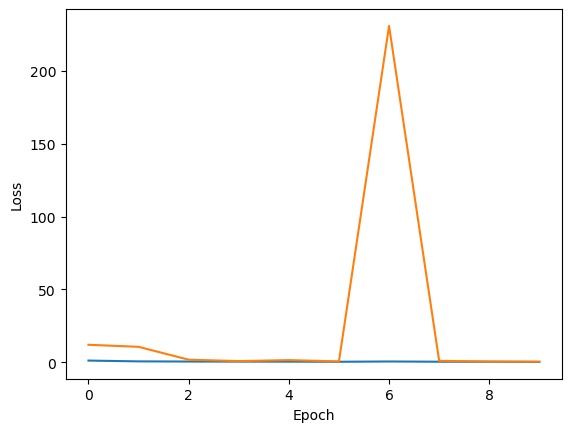

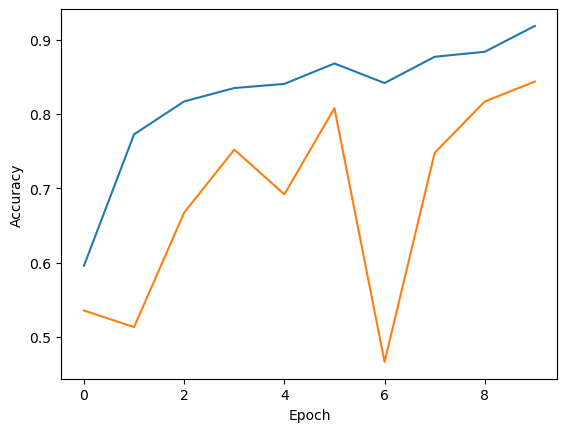

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()